In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/latent_sty,G/latent_ds,G/ref_adv,G/ref_dom,G/ref_trts,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds
0,0:00:58,100,100000,0.118919,0.016889,0.009997,0.008880,0.040453,0.010077,0.614962,...,0.577393,0.729697,0.479752,46.201836,15.132007,0.330709,0.285951,1.345831,0.026574,0.0
1,0:01:29,200,100000,0.126750,0.008126,0.070123,0.015284,0.145289,0.025092,0.754391,...,0.548803,0.523324,0.477355,33.023361,1.241167,0.197745,0.161238,0.224546,0.030399,0.0
2,0:02:00,300,100000,0.119992,0.019267,0.037825,0.015118,0.085373,0.031217,0.717256,...,0.488807,0.530928,0.245103,20.207441,4.595633,0.136434,0.109766,0.111256,0.008206,0.0
3,0:02:32,400,100000,0.033830,0.008011,0.028941,0.002522,0.002985,0.019651,0.445432,...,0.490839,0.392409,0.428261,18.168589,10.263777,0.214524,0.178044,0.252927,0.020456,0.0
4,0:03:03,500,100000,0.073312,0.007942,0.051449,0.004461,0.187613,0.031592,0.535100,...,0.479392,0.310977,0.308772,10.050860,2.848522,0.076931,0.071742,0.048757,0.005270,0.0


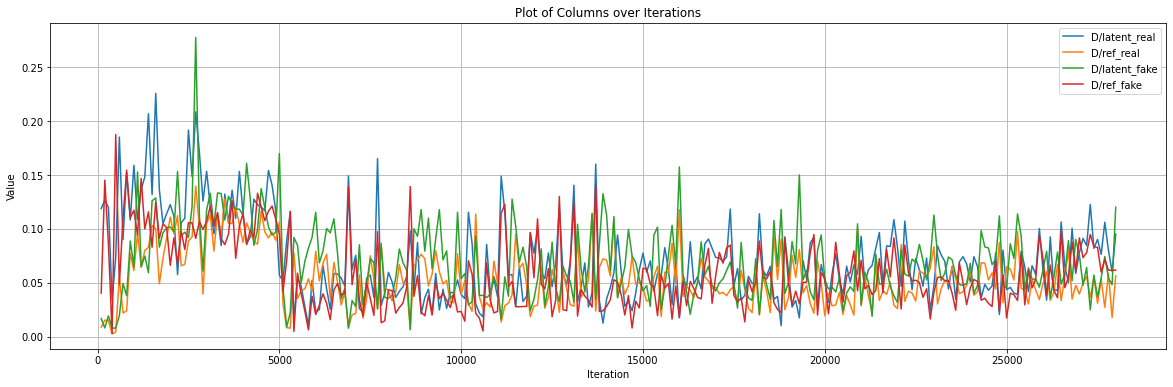

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

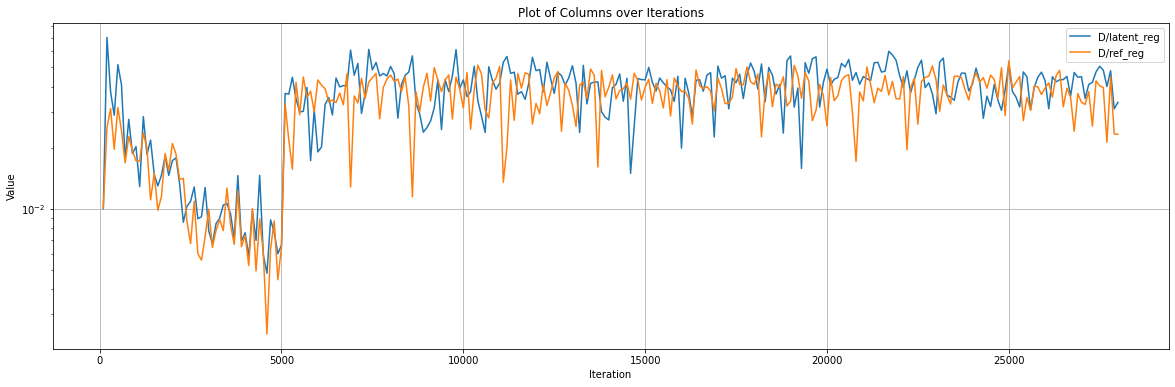

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

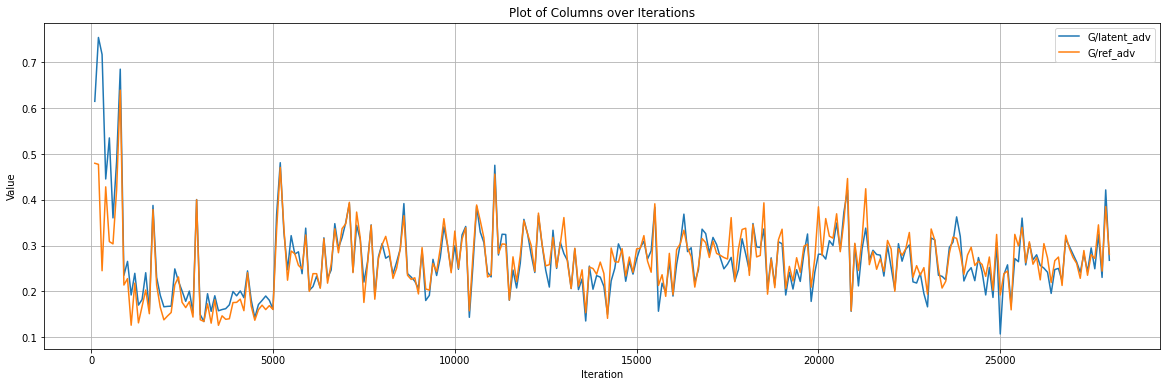

In [6]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

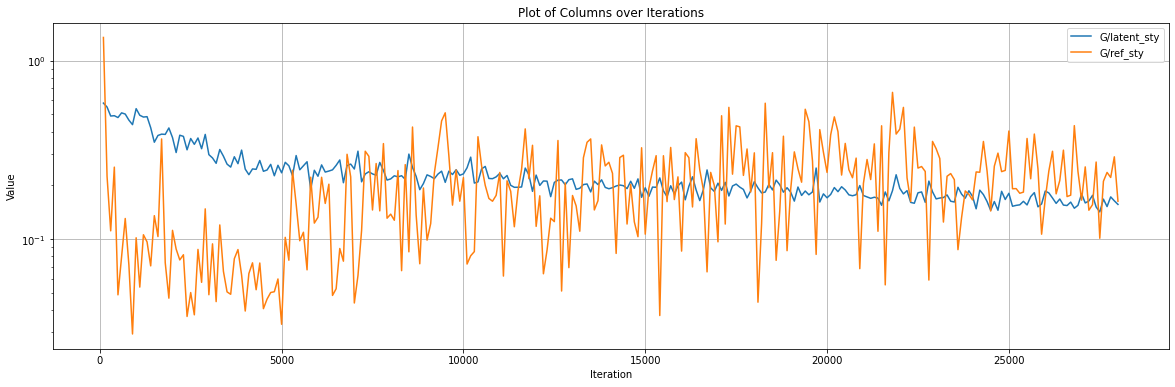

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

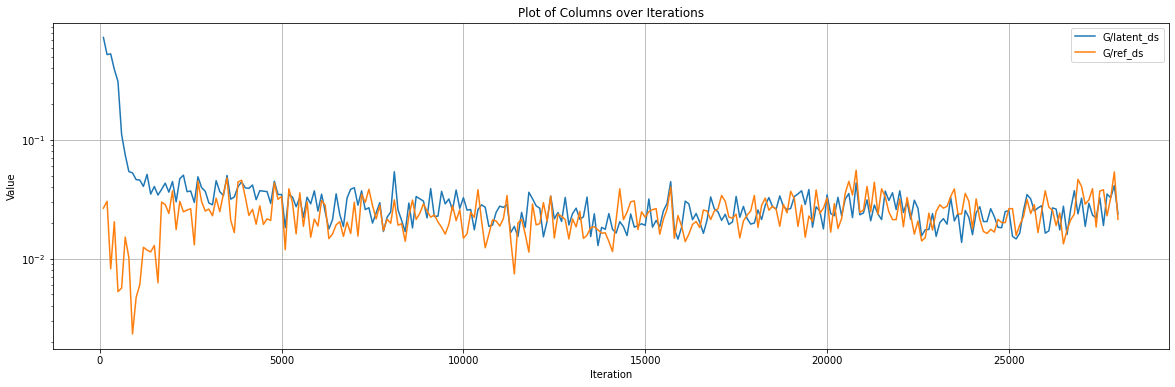

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

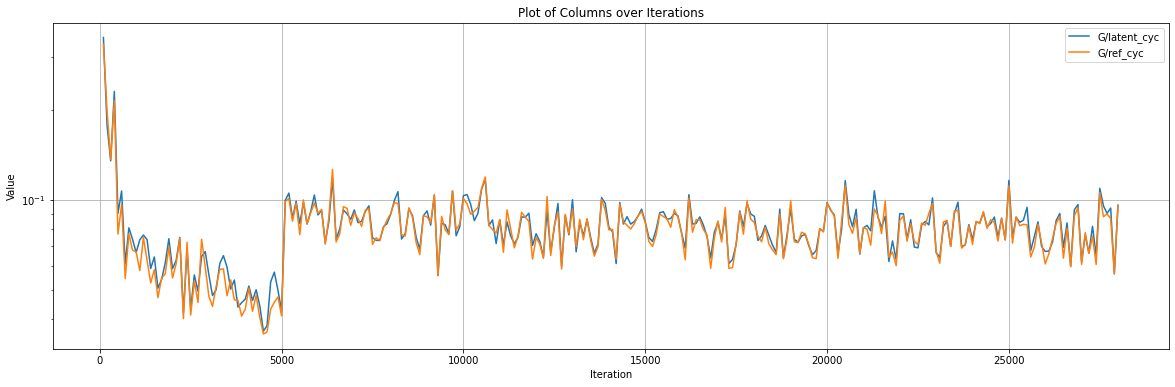

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

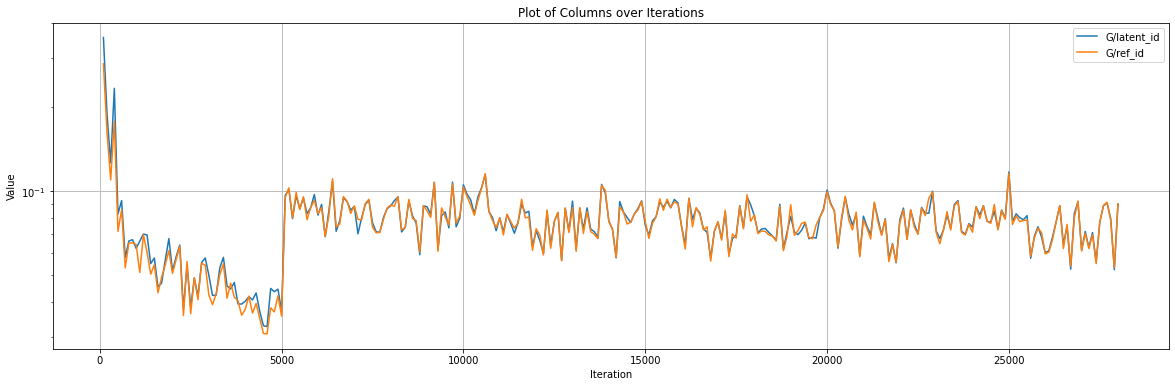

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

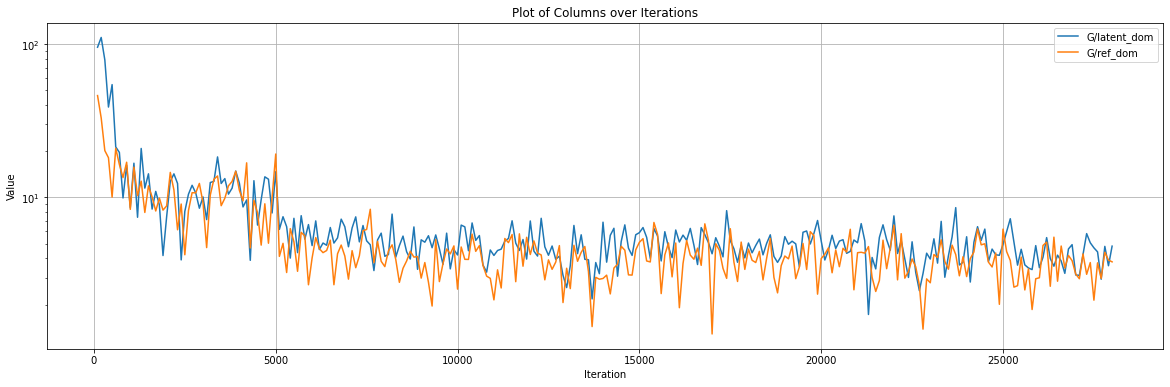

In [11]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

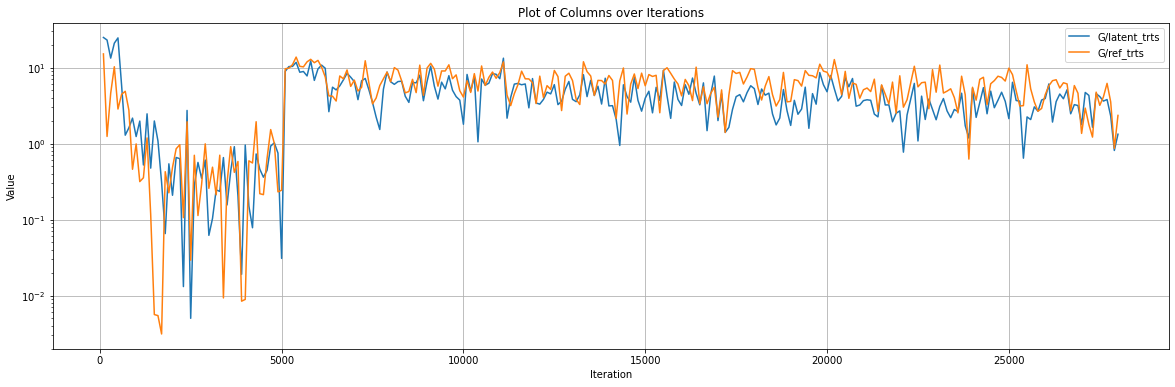

In [12]:
plot_columns(history, ['G/latent_trts', 'G/ref_trts'], logaxis=True)

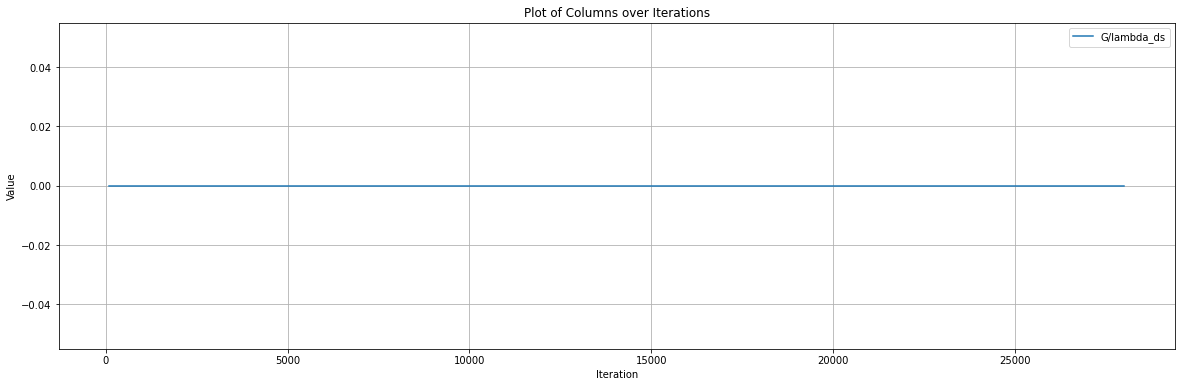

In [13]:
plot_columns(history, ['G/lambda_ds'])

# Metrics

In [14]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,target,domain,accuracy,loss
0,2000,latent,WAL,CLU,10,0.607656,1.400442
1,2000,latent,WAL,CLU,11,0.429530,3.211600
2,2000,latent,WAL,CLU,12,0.690878,1.500537
3,2000,latent,WAL,CLU,13,0.673653,1.947566
4,2000,latent,WAL,CLU,14,0.714765,1.549308


Maximum accuracy for CLD in latent mode: 0.8635 at step 4000
Maximum accuracy for CLU in latent mode: 0.8450 at step 4000
Maximum accuracy for RUN in latent mode: 0.6921 at step 4000
Maximum accuracy for WAL in latent mode: 0.8968 at step 4000


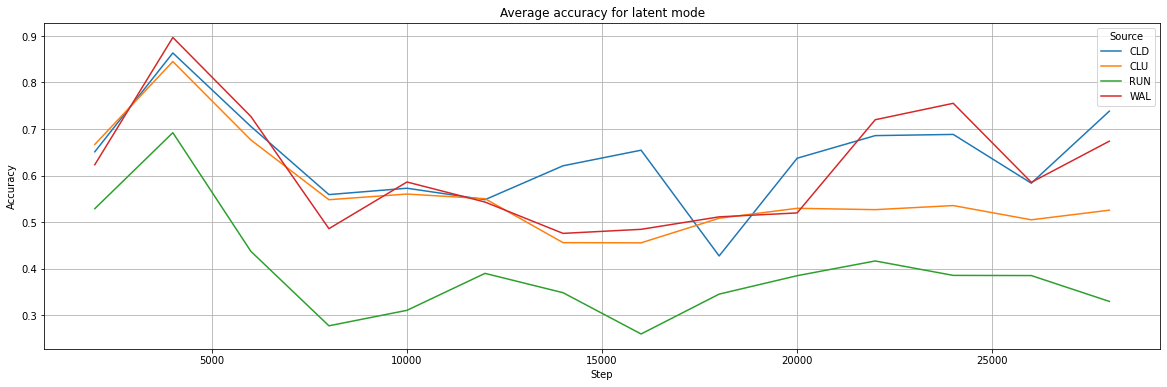

Maximum accuracy for CLD in reference mode: 0.7983 at step 4000
Maximum accuracy for CLU in reference mode: 0.6612 at step 2000
Maximum accuracy for RUN in reference mode: 0.6168 at step 4000
Maximum accuracy for WAL in reference mode: 0.7851 at step 28000


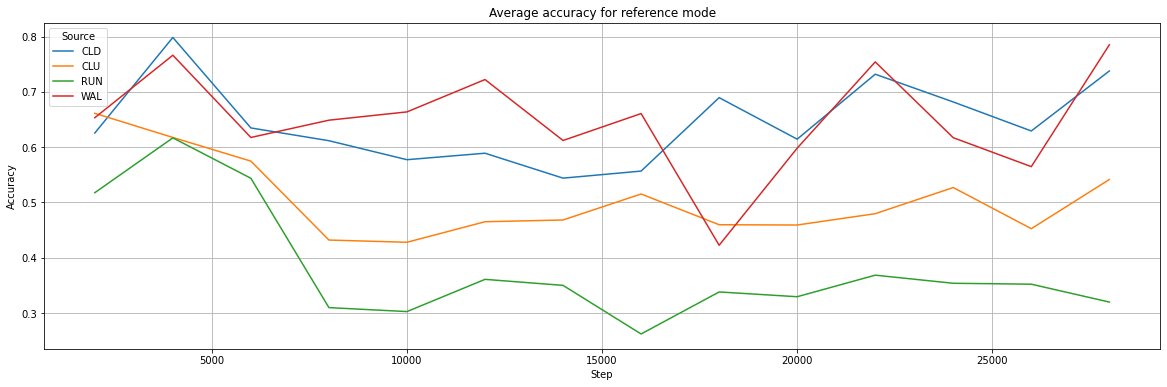

Minimum loss for CLD in latent mode: 0.6249 at step 4000
Minimum loss for CLU in latent mode: 0.6109 at step 4000
Minimum loss for RUN in latent mode: 1.3948 at step 4000
Minimum loss for WAL in latent mode: 0.5345 at step 4000


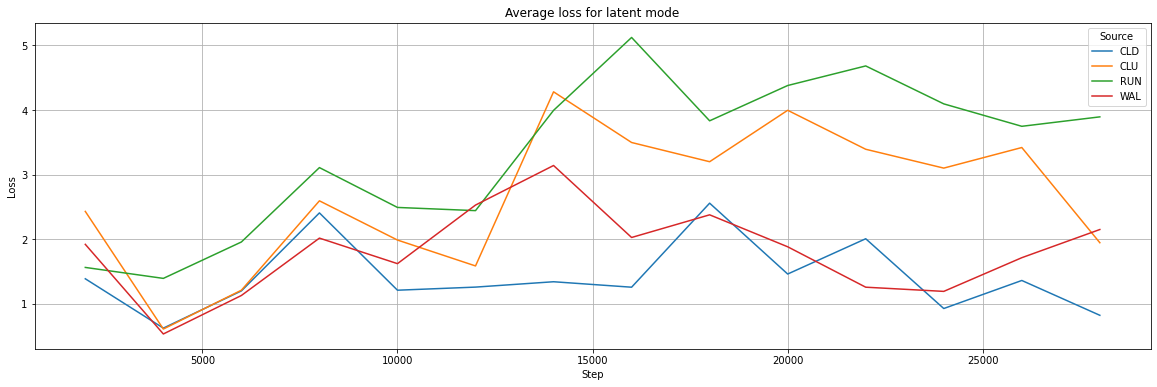

Minimum loss for CLD in reference mode: 1.0931 at step 28000
Minimum loss for CLU in reference mode: 2.1794 at step 28000
Minimum loss for RUN in reference mode: 1.4845 at step 2000
Minimum loss for WAL in reference mode: 1.0727 at step 28000


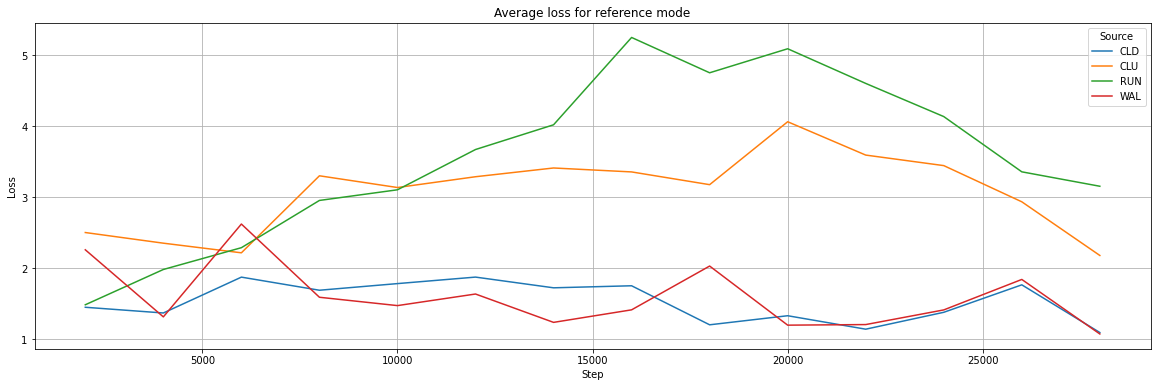

In [15]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for CLD: 0.8309 at step 4000
Maximum accuracy for CLU: 0.7313 at step 4000
Maximum accuracy for RUN: 0.6545 at step 4000
Maximum accuracy for WAL: 0.8315 at step 4000


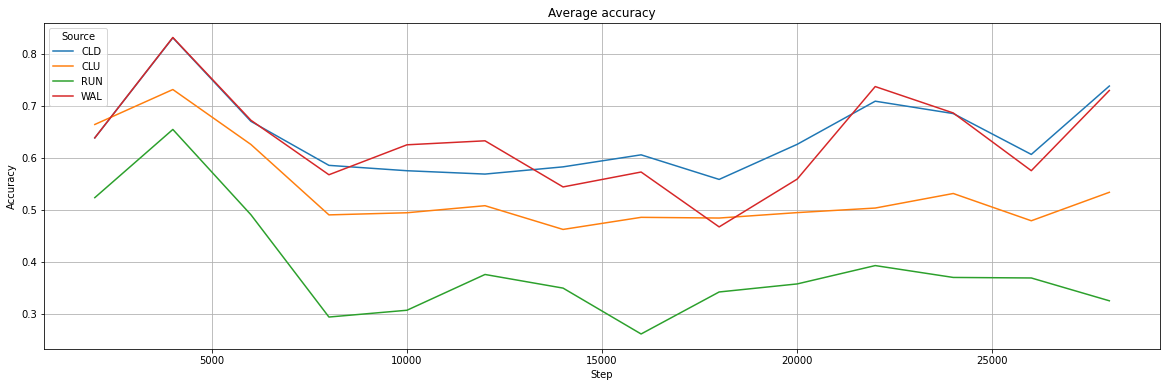

Minimum loss for CLD: 0.9583 at step 28000
Minimum loss for CLU: 1.4818 at step 4000
Minimum loss for RUN: 1.5245 at step 2000
Minimum loss for WAL: 0.9241 at step 4000


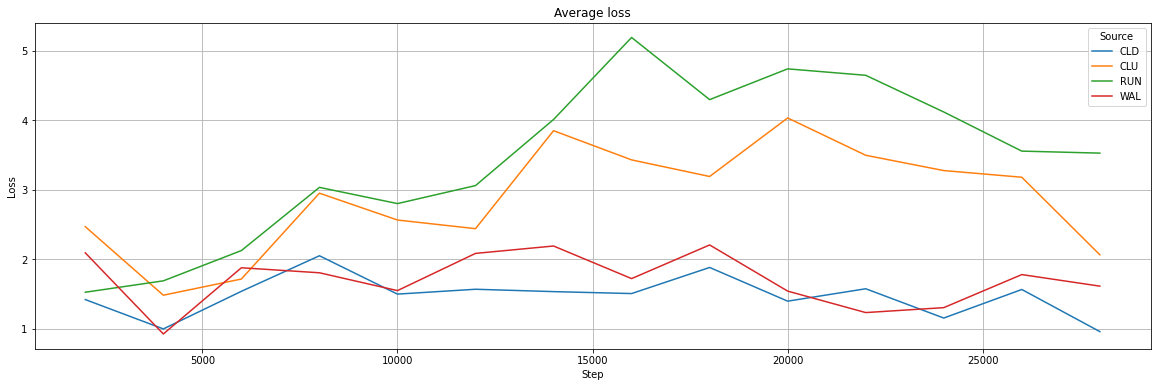

In [16]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.8243 at step 4000
Max in reference mode: 0.6997 at step 4000


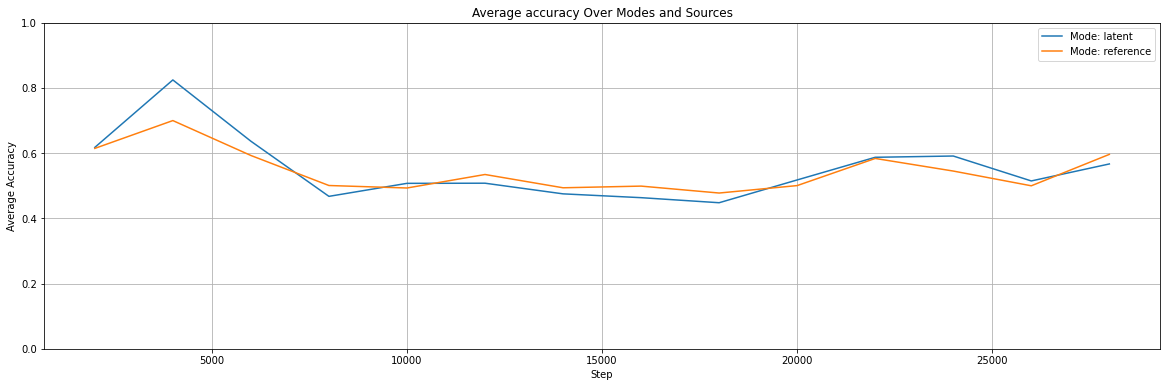

Min in latent mode: 0.7913 at step 4000
Min in reference mode: 1.7542 at step 4000


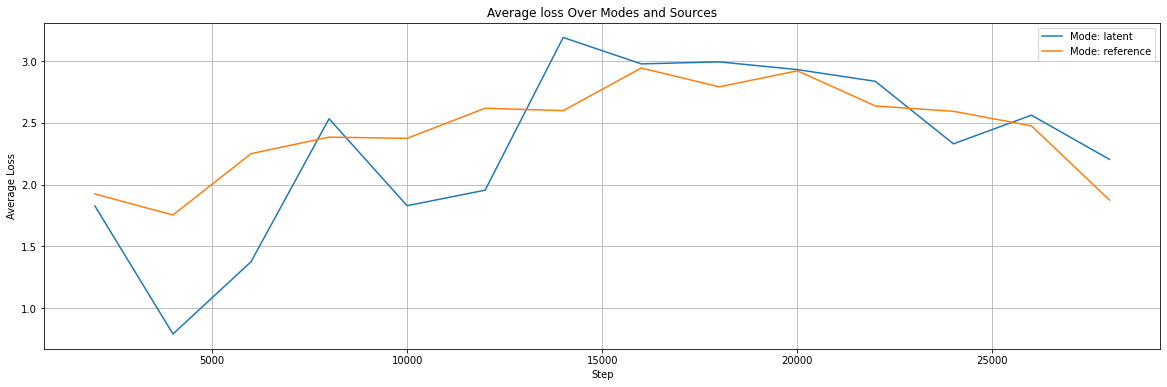

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

In [18]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,2000,latent,WAL,RUN,0.175266,4.835664
1,2000,latent,WAL,CLD,0.143325,4.881865
2,2000,latent,WAL,CLU,0.173628,5.369541
3,2000,latent,RUN,WAL,0.246600,4.074533
4,2000,latent,RUN,CLD,0.215775,4.163224


Maximum accuracy in latent mode: 0.2228 at step 4000


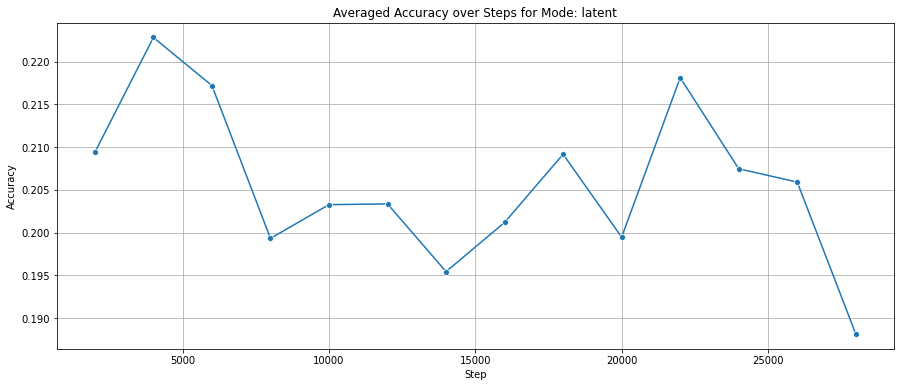

Maximum accuracy in reference mode: 0.2346 at step 4000


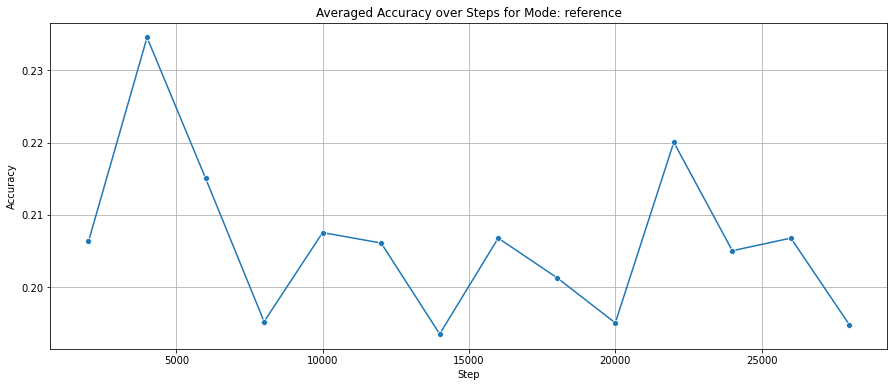

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')